# Human Data Analytics - Activity Recognition #

In [1]:
import pandas as pd
import numpy as np
import scipy.interpolate as interpolate

First, we import the dataset and we select the columns corresponding to the relevant and useful features.

In [2]:
idx_signals = list(np.arange(1,46)) \
            + list(np.arange(50,59)) \
            + list(np.arange(63,72)) \
            + list(np.arange(76,85)) \
            + list(np.arange(89,98)) \
            + list(np.arange(102,134))
idx_labels = list(np.arange(243,250))

features_all = pd.read_table('./OpportunityUCIDataset/dataset/S1-ADL1.dat', sep="\s+", header=None, usecols=idx_signals)
labels_all = pd.read_table('./OpportunityUCIDataset/dataset/S1-ADL1.dat', sep="\s+", header=None, usecols=idx_labels)

In [3]:
# drop zero-labeled head and tail of data
indexes = np.zeros((2,7))
for i in range(7):
    temp = labels_all.iloc[:,i].nonzero()
    indexes[0,i] = temp[0][0]
    indexes[1,i] = temp[0][-1]

index_min = int(np.min(indexes[0,:]))
index_max = int(np.max(indexes[1,:]))
features = features_all.iloc[index_min:index_max,:]
labels = labels_all.iloc[index_min:index_max,:]

In [4]:
# starting indexes and lengths of NaN bursts
s = features.iloc[:,0]
check = s.isnull().astype(int).groupby(s.notnull().astype(int).cumsum()).sum()
check[check > 0]

1
19837    25
19928    24
20010    54
27602    30
27714    23
28187    27
28218    45
28229    30
37349    21
37431    29
37904    29
38077    25
44988    20
45079    29
45161    46
45172    23
Name: 1, dtype: int32

In [8]:
features.iloc[19830:20000,:].interpolate(method='spline', order=3)

,1,2,3,4,5,6,7,8,9,10,...,124,125,126,127,128,129,130,131,132,133
22784,48.000000,1057.000000,106.000000,-37.0,1007.0,187.0,85.0,959.0,32.0,535.0,...,-235.0,673.0,-879.0,1950.0,-2045.0,-231.0,-2045.0,-1950.0,-231.0,9.0
22785,-76.000000,969.000000,138.000000,-19.0,970.0,201.0,57.0,960.0,54.0,543.0,...,-280.0,581.0,-738.0,1835.0,-1556.0,-72.0,-1556.0,-1835.0,-72.0,10.0
22786,-196.000000,890.000000,183.000000,-7.0,969.0,193.0,57.0,967.0,80.0,525.0,...,-131.0,546.0,-619.0,1410.0,-1560.0,-136.0,-1560.0,-1410.0,-136.0,10.0
22787,-182.000000,847.000000,242.000000,7.0,982.0,194.0,88.0,972.0,60.0,525.0,...,-202.0,610.0,-641.0,1211.0,-682.0,-168.0,-682.0,-1211.0,-168.0,10.0
22788,-131.000000,873.000000,332.000000,39.0,989.0,128.0,126.0,1005.0,71.0,520.0,...,92.0,681.0,-399.0,461.0,-525.0,265.0,-525.0,-461.0,265.0,10.0
22789,-176.000000,806.000000,461.000000,2.0,1004.0,128.0,130.0,1032.0,40.0,527.0,...,14.0,734.0,-508.0,131.0,185.0,984.0,185.0,-131.0,984.0,10.0
22790,-123.000000,851.000000,595.000000,59.0,996.0,148.0,154.0,1045.0,31.0,509.0,...,-507.0,442.0,-1227.0,-215.0,3503.0,872.0,3503.0,215.0,872.0,9.0
22791,-46.744829,924.235451,715.530151,59.0,979.0,113.0,111.0,1033.0,61.0,516.0,...,479.0,248.0,-1318.0,-2328.0,2802.0,310.0,2802.0,2328.0,310.0,9.0
22792,17.632625,986.270339,815.189216,54.0,1008.0,93.0,82.0,1020.0,117.0,518.0,...,288.0,990.0,-1402.0,-1449.0,441.0,517.0,441.0,1449.0,517.0,8.0
22793,70.916369,1037.814623,895.647125,-177.0,1149.0,0.0,8.0,1149.0,144.0,525.0,...,-739.0,1119.0,-1261.0,194.0,1027.0,971.0,1027.0,-194.0,971.0,8.0


In [9]:
# starting indexes and lengths of NaN bursts
s = features.iloc[:,0]
check = s.isnull().astype(int).groupby(s.notnull().astype(int).cumsum()).sum()
check[check > 0]

1
19837    25
19928    24
20010    54
27602    30
27714    23
28187    27
28218    45
28229    30
37349    21
37431    29
37904    29
38077    25
44988    20
45079    29
45161    46
45172    23
Name: 1, dtype: int32

In [10]:
features.iloc[19830:20000,:]

,1,2,3,4,5,6,7,8,9,10,...,124,125,126,127,128,129,130,131,132,133
22784,48.0,1057.0,106.0,-37.0,1007.0,187.0,85.0,959.0,32.0,535.0,...,-235.0,673.0,-879.0,1950.0,-2045.0,-231.0,-2045.0,-1950.0,-231.0,9.0
22785,-76.0,969.0,138.0,-19.0,970.0,201.0,57.0,960.0,54.0,543.0,...,-280.0,581.0,-738.0,1835.0,-1556.0,-72.0,-1556.0,-1835.0,-72.0,10.0
22786,-196.0,890.0,183.0,-7.0,969.0,193.0,57.0,967.0,80.0,525.0,...,-131.0,546.0,-619.0,1410.0,-1560.0,-136.0,-1560.0,-1410.0,-136.0,10.0
22787,-182.0,847.0,242.0,7.0,982.0,194.0,88.0,972.0,60.0,525.0,...,-202.0,610.0,-641.0,1211.0,-682.0,-168.0,-682.0,-1211.0,-168.0,10.0
22788,-131.0,873.0,332.0,39.0,989.0,128.0,126.0,1005.0,71.0,520.0,...,92.0,681.0,-399.0,461.0,-525.0,265.0,-525.0,-461.0,265.0,10.0
22789,-176.0,806.0,461.0,2.0,1004.0,128.0,130.0,1032.0,40.0,527.0,...,14.0,734.0,-508.0,131.0,185.0,984.0,185.0,-131.0,984.0,10.0
22790,-123.0,851.0,595.0,59.0,996.0,148.0,154.0,1045.0,31.0,509.0,...,-507.0,442.0,-1227.0,-215.0,3503.0,872.0,3503.0,215.0,872.0,9.0
22791,NaN,NaN,NaN,59.0,979.0,113.0,111.0,1033.0,61.0,516.0,...,479.0,248.0,-1318.0,-2328.0,2802.0,310.0,2802.0,2328.0,310.0,9.0
22792,NaN,NaN,NaN,54.0,1008.0,93.0,82.0,1020.0,117.0,518.0,...,288.0,990.0,-1402.0,-1449.0,441.0,517.0,441.0,1449.0,517.0,8.0
22793,NaN,NaN,NaN,-177.0,1149.0,0.0,8.0,1149.0,144.0,525.0,...,-739.0,1119.0,-1261.0,194.0,1027.0,971.0,1027.0,-194.0,971.0,8.0


In [6]:
# splines
features = pd.DataFrame(np.zeros(shape=features_all.shape))
for i in np.arange(0,50000, 2000):
    features.loc[i:i+2000,:] = features_all.loc[i:i+2000,:].interpolate(method='spline', order=3)

In [7]:
s = features.iloc[:,2]
check = s.isnull().astype(int).groupby(s.notnull().astype(int).cumsum()).sum()
check[check > 0 ]

2
0    2954
Name: 2, dtype: int32

In [7]:
features_all.iloc[20000:25000,0]

0         87.0
1        124.0
2        102.0
3         59.0
4        119.0
5         99.0
6        116.0
7        171.0
8        145.0
9        106.0
10        52.0
11       107.0
12        93.0
13        12.0
14        52.0
15        30.0
16        -2.0
17        -7.0
18        11.0
19        34.0
20       -37.0
21        -9.0
22        39.0
23         5.0
24        13.0
25        95.0
26        70.0
27        36.0
28        -4.0
29       -31.0
         ...  
51086      NaN
51087      NaN
51088      NaN
51089      NaN
51090      NaN
51091      NaN
51092      NaN
51093      NaN
51094      NaN
51095      NaN
51096      NaN
51097      NaN
51098      NaN
51099      NaN
51100      NaN
51101      NaN
51102      NaN
51103      NaN
51104      NaN
51105      NaN
51106      NaN
51107      NaN
51108      NaN
51109      NaN
51110      NaN
51111      NaN
51112      NaN
51113      NaN
51114      NaN
51115      NaN
Name: 1, Length: 51116, dtype: float64

In [28]:
feat_inter(np.linspace(0,51116,51116))


array([nan, nan, nan, ..., nan, nan, nan])

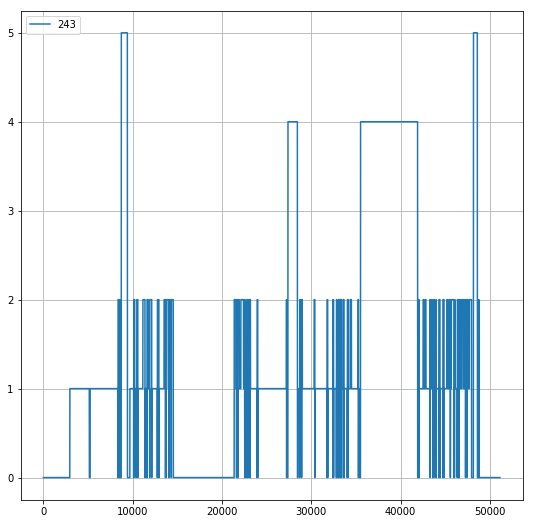

In [24]:
label_columns.plot(y=243, 
                   kind='line',
                   grid=True,
                   figsize=(9,9))